# Применение алгоритмов кластеризации для диагностики кризиса теплообмена в ЯЭУ
Группа: ИВТ-М20.<br/>
Студент: Лискунов Роман Геннадьвич

In [563]:
import matplotlib.pyplot as plt
from pandas import (
    DataFrame,
    read_csv
)
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralBiclustering
from sklearn.decomposition import PCA
import matplotlib as mpl

In [564]:
mpl.style.use(['ggplot'])

## Чтение данных из файлов (1)

In [565]:
target = DataFrame(read_csv('data/target5.csv', header=0))
target.columns = ['index']
var = DataFrame(read_csv('data/var5.csv', sep=',', header=None))


## Транспонирование исходной матрицы (2)

In [566]:
targetT = target.T
varT = var.T

## Отображение нескольких первых и последних записей (3)

In [567]:
target.head()
target.tail()

varT.head()
varT.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
195,3.968885,4.395811,4.308547,2.997465,2.723231,3.391700,3.440988,1.358350,2.280644,3.947055,...,4.450079,3.134341,4.078345,3.632046,3.816937,3.254838,2.817790,3.188179,3.513910,4.091145
196,4.242111,3.344781,3.668049,4.298873,4.619140,4.380358,4.184601,4.221955,4.025305,3.743998,...,3.684472,4.030382,3.610464,4.238613,3.835101,3.797532,3.309454,3.812842,3.272825,3.537379
197,6.474413,4.956981,4.852539,3.414158,5.259307,2.753954,4.926043,4.164338,3.578715,2.478196,...,4.813380,2.472762,3.119563,4.353143,3.980821,3.936760,3.232622,3.949153,2.975979,3.217924
198,5.405617,5.128044,4.612163,3.820049,4.729111,3.863502,4.551732,4.203220,4.079489,3.377491,...,2.948352,3.774058,3.376625,3.204240,3.143736,4.289886,4.293338,3.418182,4.381537,3.913806
199,2.931317,5.173970,2.978478,4.267044,3.167341,5.802209,3.189512,2.756688,4.006443,4.811639,...,4.671333,2.839370,3.287504,3.485200,3.351141,3.986116,4.153411,3.238472,3.549843,2.705482


## Графики временных реализаций каждого спектра (4)


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

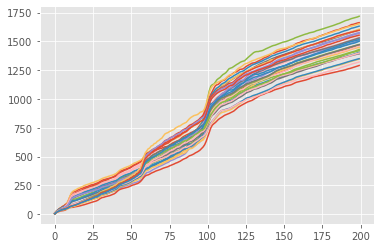

In [568]:
varCS = varT.cumsum()
plt.figure()
varCS.plot(legend=False)

## График временной реализации для двух случайных спектров (5)

<AxesSubplot:>

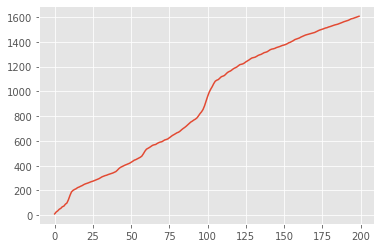

In [569]:
varCS[4].plot(legend=False)

## Мощность каждого спектра (6)

In [570]:
varPower = round(varT.sum(axis = 0), 2)
varPower

0     1467.89
1     1405.75
2     1505.32
3     1600.52
4     1605.70
5     1718.63
6     1534.71
7     1663.00
8     1632.57
9     1523.90
10    1530.40
11    1449.30
12    1430.12
13    1460.62
14    1291.22
15    1502.15
16    1570.58
17    1392.40
18    1345.57
19    1473.14
20    1399.76
21    1596.61
22    1350.12
23    1576.82
24    1471.70
25    1653.05
26    1420.47
27    1321.17
28    1554.44
29    1515.23
dtype: float64

## График распределения целевой переменной target. Фиксация начала кризиса  (7)


17

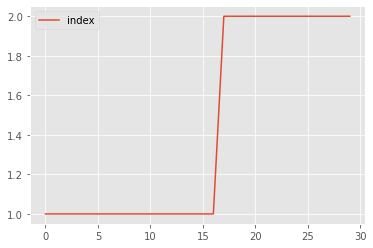

In [571]:
target.plot()
targetTimed = target
targetTimed['time'] = target.index
crisisLine = targetTimed[targetTimed['index']>=2].iloc[0]['time']
crisisLine


## График мощности спектра с вертикальной линией (8)

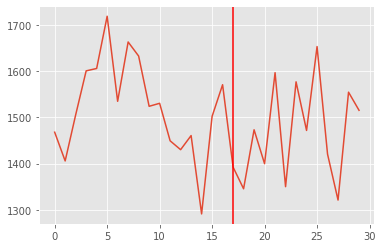

In [572]:
varPlotPower = varPower.plot()
varPlotPower.axvline(x = crisisLine, color='r')

## Описательные статистики мощностей до и после начала кризиса (9)

In [573]:
varPowerBefore = varPower[0:crisisLine]
varPowerAfter = varPower[crisisLine:]
varPower.describe()

count      30.000000
mean     1498.762000
std       107.160328
min      1291.220000
25%      1422.882500
50%      1503.735000
75%      1575.260000
max      1718.630000
dtype: float64

## Средние значения мощности спектра до кризиса и после (10)

In [574]:
varPowerBefore.mean()

1523.0811764705886

In [575]:
varPowerAfter.mean()

1466.96

## Добавление к графику средних значений мощности спектра до кризиса и после (11)

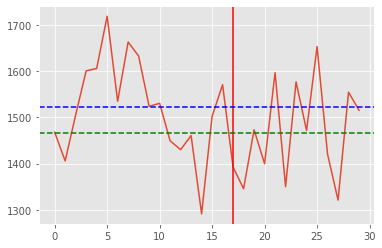

In [576]:
varPlot = varPower.plot()
varPlot.axvline(x = crisisLine, color='r')
varPlot.axhline(y = varPowerAfter.mean(), color='g', linestyle = '--')
varPlot.axhline(y = varPowerBefore.mean(), color='b', linestyle = '--')

## Диаграммы ящиков с усами (boxplots) мощности спектра до кризиса и после (11)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa13f630a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa13f63e160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa13f630700>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa13f63e820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa13f63eb80>,
 'means': []}

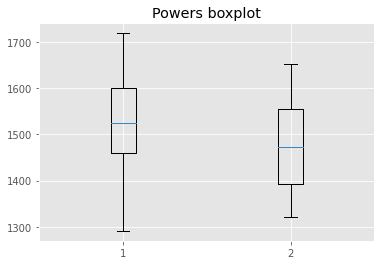

In [577]:
data = [varPowerBefore, varPowerAfter]
fig, ax = plt.subplots()
ax.set_title('Powers boxplot')
ax.boxplot(data)

После кризиса среднее значение мощности существенно уменьшается.

## Средняя частота спектра (12)

In [578]:
varFreq = round(varT.pow(2).sum(axis = 0), 2)
varPowerFrequency = round(varFreq/varPower, 2)
varPowerFrequency

0     10.83
1     11.79
2     10.91
3     15.21
4     12.80
5     19.02
6     11.72
7     13.47
8     14.25
9     16.70
10    14.41
11    14.07
12    11.50
13    10.42
14    11.00
15    15.21
16    12.10
17    10.66
18     9.94
19    10.90
20    10.38
21    13.36
22     9.70
23    12.40
24    11.33
25    15.83
26    10.63
27     9.73
28    13.45
29    11.98
dtype: float64

## График значений средних частот спектра с вертикальной линией (13)

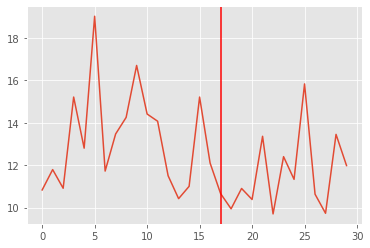

In [579]:
varPlot = varPowerFrequency.plot()
varPlot.axvline(x = crisisLine, color='r')

## Описательные статистики частот до и после начала кризиса (14)

In [580]:
varPowerFreqBefore = varPowerFrequency[0:crisisLine]
varPowerFreqAfter = varPowerFrequency[crisisLine:]

## Средние значения мощности спектра до кризиса и после (15)

In [581]:
varPowerFreqBefore.mean()

13.259411764705881

In [582]:
varPowerFreqAfter.mean()

11.56076923076923

## Добавление к графику средних значений частот спектра до кризиса и после (16)

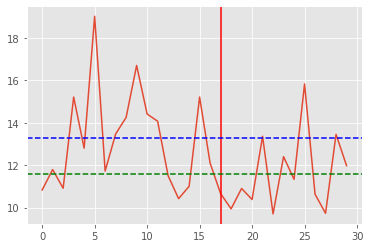

In [583]:
varPlot = varPowerFrequency.plot()
varPlot.axvline(x = crisisLine, color='r')
varPlot.axhline(y = varPowerFreqAfter.mean(), color='g', linestyle = '--')
varPlot.axhline(y = varPowerFreqBefore.mean(), color='b', linestyle = '--')

## Диаграммы ящиков с усами (boxplots) частот спектра до кризиса и после (16)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa13f927f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa13f991670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa13f927c10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa13f991d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa13f99c0d0>,
 'means': []}

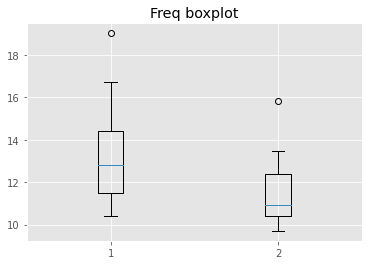

In [584]:
data = [varPowerFreqBefore, varPowerFreqAfter]
fig, ax = plt.subplots()
ax.set_title('Freq boxplot')
ax.boxplot(data)

После кризиса среднее значение мощности существенно уменьшается.

## График мощностей и частот с указанием в каких точках начался кризис (17)

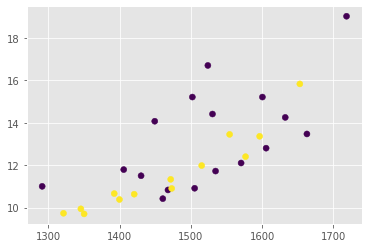

In [585]:
fig, ax = plt.subplots()
ax.scatter(varPower, varPowerFrequency, c=target['index'])

## Графики двух случайных частот (18)

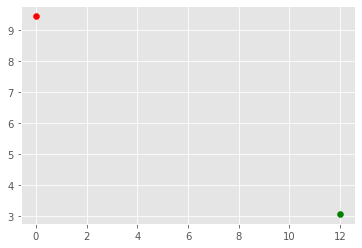

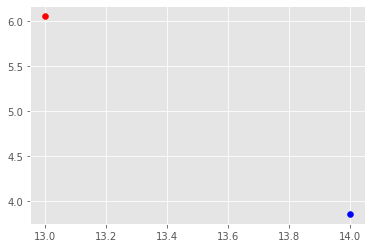

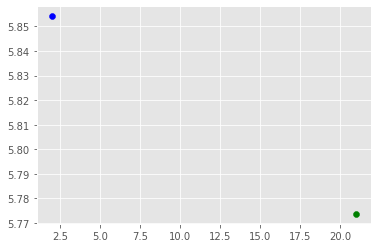

In [586]:
fig, ax = plt.subplots()
ax.scatter(0, varT[0][125], c='r')
ax.scatter(12, varT[12][36], c='g')

fig, ax = plt.subplots()
ax.scatter(14, varT[14][146], c='b')
ax.scatter(13, varT[13][78], c='r')

fig, ax = plt.subplots()
ax.scatter(21, varT[21][183], c='g')
ax.scatter(2, varT[2][136], c='b')

## Метод понижения размерности (19)

In [587]:
pca = PCA(n_components=2)
pca.fit(varT)

PCA(n_components=2)

## Методы кластеризации (20)

In [588]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(varT)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [589]:
clustering = AgglomerativeClustering(n_clusters=2).fit(varT)
clustering.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [590]:
clustering = SpectralBiclustering(n_clusters=2, random_state=0).fit(varT)
print(clustering.row_labels_,end='\n\n')
print(clustering.column_labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0]
